In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

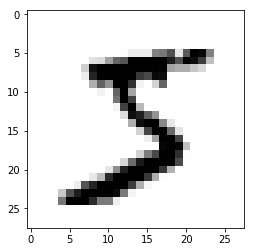

In [8]:
single_image
plt.imshow(single_image, cmap='gray_r')

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_train.shape

(60000,)

In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [13]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
single_image.max()

255

In [15]:
x_train = x_train / x_train.max()

In [16]:
x_test = x_test / x_test.max()

In [17]:
scaled_image = x_train[0]

In [19]:
scaled_image.max()

1.0

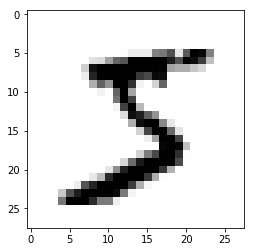

In [20]:
plt.imshow(scaled_image, cmap='gray_r')

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_train = x_train.reshape(60000,28,28,1)

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [24]:
x_test = x_test.reshape(10000,28,28,1)

In [25]:
x_test.shape

(10000, 28, 28, 1)

In [26]:
from keras.models import Sequential

In [27]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [28]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 28s 466us/step - loss: 0.1394 - acc: 0.9572
Epoch 2/2
60000/60000 [==============================] - 27s 452us/step - loss: 0.0481 - acc: 0.9856


In [31]:
model.metrics_names

['loss', 'acc']

In [32]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 118us/step


[0.046889796281117016, 0.9848]

In [33]:
from sklearn.metrics import classification_report

In [34]:
predictions = model.predict_classes(x_test)

In [35]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [37]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [38]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.97      0.99      0.98      1032
          3       0.97      0.99      0.98      1010
          4       1.00      0.98      0.99       982
          5       1.00      0.98      0.99       892
          6       0.99      0.98      0.99       958
          7       0.98      0.99      0.98      1028
          8       0.99      0.98      0.98       974
          9       0.98      0.97      0.98      1009

avg / total       0.98      0.98      0.98     10000



In [39]:
## KERAS CNN with CIFAR-10

In [40]:
from keras.datasets import cifar10

In [41]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 7s 0us/step


In [42]:
x_train.shape

(50000, 32, 32, 3)

In [43]:
x_train[0].shape

(32, 32, 3)

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

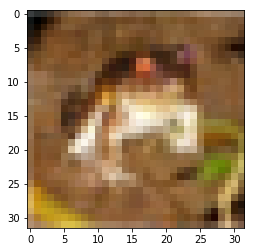

In [45]:
plt.imshow(x_train[0])

In [46]:
x_train.max()

255

In [47]:
x_train = x_train/x_train.max()

In [48]:
x_test = x_test/x_test.max()

In [49]:
x_test.shape

(10000, 32, 32, 3)

In [50]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [51]:
from keras.utils import to_categorical

In [52]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [53]:
from keras.models import Sequential

In [54]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [55]:
model = Sequential()

# RELU = Rectified Layer Unit
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total para

In [57]:
model.fit(x_train, y_cat_train, verbose=1, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 57s 1ms/step - loss: 1.5209 - acc: 0.4540
Epoch 2/10
50000/50000 [==============================] - 58s 1ms/step - loss: 1.1549 - acc: 0.5944
Epoch 3/10
50000/50000 [==============================] - 55s 1ms/step - loss: 1.0001 - acc: 0.6525
Epoch 4/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.8958 - acc: 0.6893
Epoch 5/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.8267 - acc: 0.7179
Epoch 6/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.7710 - acc: 0.7366
Epoch 7/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.7241 - acc: 0.7546
Epoch 8/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.6949 - acc: 0.7669
Epoch 9/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.6593 - acc: 0.7774
Epoch 10/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.6279 - acc: 0.7907

In [58]:
model.metrics_names

['loss', 'acc']

In [59]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 4s 383us/step


[1.185381105041504, 0.645]

In [61]:
from sklearn.metrics import classification_report

In [62]:
predictions = model.predict_classes(x_test)

In [63]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.69      0.71      0.70      1000
          1       0.93      0.60      0.73      1000
          2       0.60      0.53      0.56      1000
          3       0.45      0.52      0.48      1000
          4       0.60      0.61      0.61      1000
          5       0.63      0.46      0.53      1000
          6       0.79      0.64      0.70      1000
          7       0.75      0.67      0.71      1000
          8       0.66      0.84      0.74      1000
          9       0.55      0.88      0.68      1000

avg / total       0.67      0.65      0.64     10000



In [64]:
model.save('large_cifar10_model.h5')